This analysis will be used by the claims handlers to understand the fraud hotspots & the objective of model is to-
alert the handlers on any potential fraud cases.

In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import roc_auc_score

In [43]:
auto_claim=pd.read_excel(r"C:\Users\JaisoN\Desktop\Allianz\auto_claim.xlsm")

In [44]:
auto_claim.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [45]:
auto_claim.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Let's check the null values in the data set

In [4]:
percent_missing = auto_claim.isnull().sum() * 100 / len(auto_claim)
print(percent_missing)

months_as_customer               0.0
age                              0.0
policy_number                    0.0
policy_bind_date                 0.0
policy_state                     0.0
policy_csl                       0.0
policy_deductable                0.0
policy_annual_premium            0.0
umbrella_limit                   0.0
insured_zip                      0.0
insured_sex                      0.0
insured_education_level          0.0
insured_occupation               0.0
insured_hobbies                  0.0
insured_relationship             0.0
capital-gains                    0.0
capital-loss                     0.0
incident_date                    0.0
incident_type                    0.0
collision_type                   0.0
incident_severity                0.0
authorities_contacted            0.0
incident_state                   0.0
incident_city                    0.0
incident_location                0.0
incident_hour_of_the_day         0.0
number_of_vehicles_involved      0.0
p

 Column '_c30' is a null column, we can directly delete the column 

In [46]:
auto_claim.drop('_c39',axis=1,inplace=True)

In [6]:
auto_claim.shape

(1000, 39)

In [7]:
auto_claim.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

Let's check the unique values of each column 

In [8]:
cat_cols=auto_claim.select_dtypes(['object']).columns
for col in cat_cols:
    print(col)
    print(auto_claim[col].value_counts())
    print('--------------------------------')

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
--------------------------------
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
--------------------------------
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
--------------------------------
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
--------------------------------
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
--------------------------------
in

Let's check the target variable value distribution

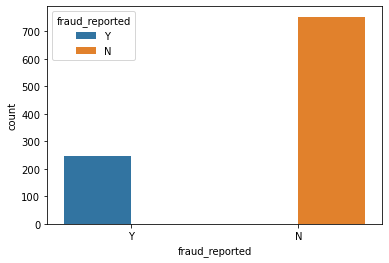

In [9]:
sns.countplot(x=auto_claim['fraud_reported'],hue=auto_claim['fraud_reported'],data=auto_claim)

policy_csl,collision_type,property_damage,incident_location,police_report_available - All these features need some fix

In [10]:
auto_claim['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

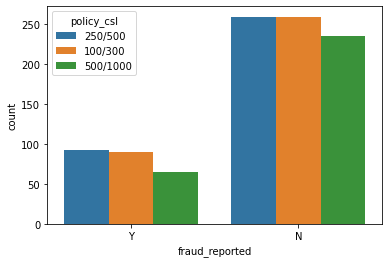

In [11]:
sns.countplot(x=auto_claim['fraud_reported'],hue=auto_claim['policy_csl'],data=auto_claim)

In [47]:
k=auto_claim['policy_csl'].str.split('/',expand=True).astype(float)
auto_claim['policy_csl']=0.5*(k[0]+k[1])

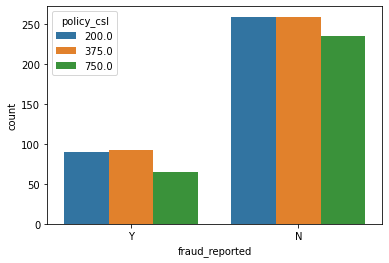

In [13]:
sns.countplot(x=auto_claim['fraud_reported'],hue=auto_claim['policy_csl'],data=auto_claim)

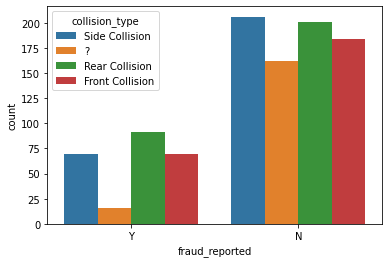

In [14]:
sns.countplot(x=auto_claim['fraud_reported'],hue=auto_claim['collision_type'],data=auto_claim)

In [48]:
auto_claim['collision_type']=auto_claim['collision_type'].str.replace('?','Unknown')

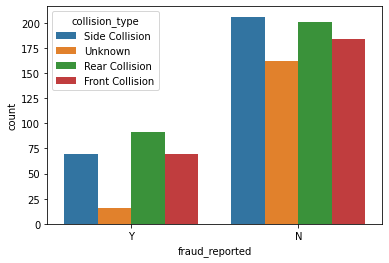

In [16]:
sns.countplot(x=auto_claim['fraud_reported'],hue=auto_claim['collision_type'],data=auto_claim)

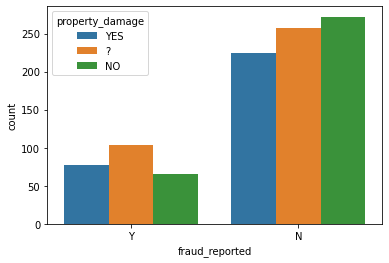

In [17]:
sns.countplot(x=auto_claim['fraud_reported'],hue=auto_claim['property_damage'],data=auto_claim)

In [49]:
auto_claim['property_damage']=auto_claim['property_damage'].str.replace('?','Unknown')

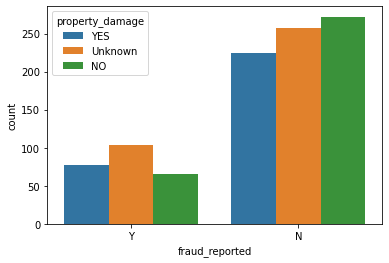

In [19]:
sns.countplot(x=auto_claim['fraud_reported'],hue=auto_claim['property_damage'],data=auto_claim)

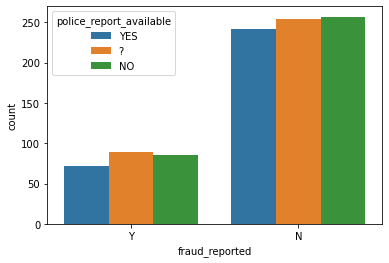

In [20]:
sns.countplot(x=auto_claim['fraud_reported'],hue=auto_claim['police_report_available'],data=auto_claim)

In [50]:
auto_claim['police_report_available']=auto_claim['police_report_available'].str.replace('?','Unknown')

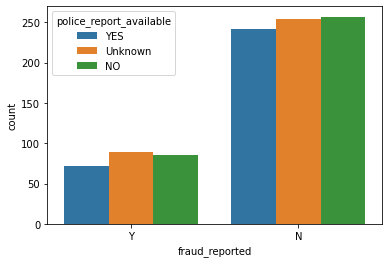

In [22]:
sns.countplot(x=auto_claim['fraud_reported'],hue=auto_claim['police_report_available'],data=auto_claim)

Let'd drop uncecessary columns 

In [51]:
auto_claim.drop(['policy_number','insured_hobbies','insured_zip','policy_bind_date','incident_date'],axis=1,inplace=True)

In [24]:
auto_claim.head()

months_as_customer  age policy_state  policy_csl  policy_deductable  \
0                 328   48           OH       375.0               1000   
1                 228   42           IN       375.0               2000   
2                 134   29           OH       200.0               2000   
3                 256   41           IL       375.0               2000   
4                 228   44           IL       750.0               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation  ... witnesses  police_report_available  \
0       craft-repair  ...         2                      YES   
1  machine-op-inspct  ...         0                  Unknown   
2              sales  ...         3                       NO   
3       armed-forces  ...         2                       NO   
4              sales  ...         1                       NO   

   total_claim_amount injury_claim property_claim vehicle_claim  auto_make  \
0               71610         6510          13020         52080       Saab   
1                5070          780            780          3510   Mercedes   
2               34650         7700           3850         23100      Dodge   
3               63400         6340           6340         50720  Chevrolet   
4                6500         1300            650          4550     Accura   

  auto_model auto_year fraud_reported  
0        92x      2004              Y  
1       E400      2007              Y  
2        RAM      2007              N  
3      Tahoe      2014              Y  
4        RSX      2009              N  

[5 rows x 34 columns]

Let's convert the target veriable into number's

In [52]:
auto_claim['fraud_reported']=pd.Series(np.where(auto_claim.fraud_reported.values == 'Y', 1, 0),
          auto_claim.index)

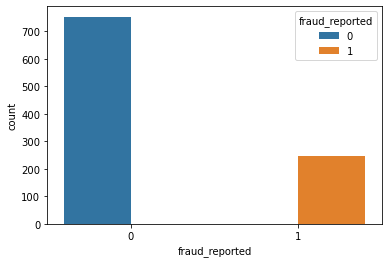

In [26]:
sns.countplot(x=auto_claim['fraud_reported'],hue=auto_claim['fraud_reported'],data=auto_claim)

Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

1. Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
2. Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [53]:
cat_cols=auto_claim.select_dtypes(['object']).columns
#cat_cols=cat_cols.drop('fraud_reported')
print(cat_cols)

Index(['policy_state', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make',
       'auto_model'],
      dtype='object')


In [28]:
auto_claim['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

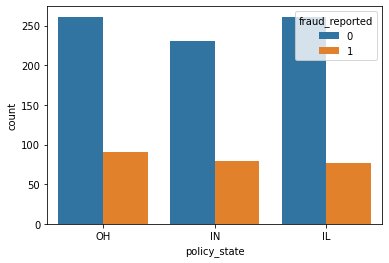

In [29]:
# From graph we can see that 'OH' Business have the highest Price.

sns.countplot(x=auto_claim['policy_state'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [54]:
# As policy_state is Nominal Categorical data we will perform OneHotEncoding

policy_state = auto_claim[["policy_state"]]

policy_state = pd.get_dummies(policy_state, drop_first= True)

policy_state.head()

policy_state_IN  policy_state_OH
0                0                1
1                1                0
2                0                1
3                0                0
4                0                0

In [31]:
auto_claim['insured_sex'].value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

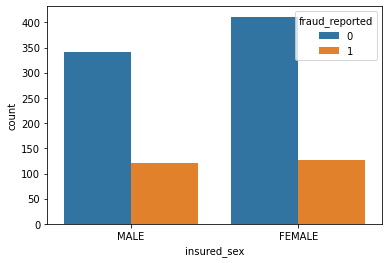

In [32]:
sns.countplot(x=auto_claim['insured_sex'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [55]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

auto_claim.replace({"MALE": 0, "FEMALE": 1}, inplace = True)

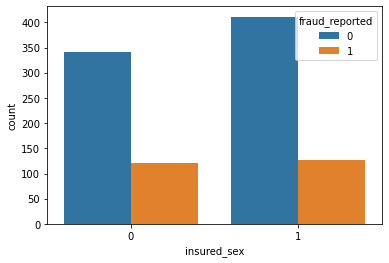

In [34]:
sns.countplot(x=auto_claim['insured_sex'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [35]:
auto_claim['insured_education_level'].value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

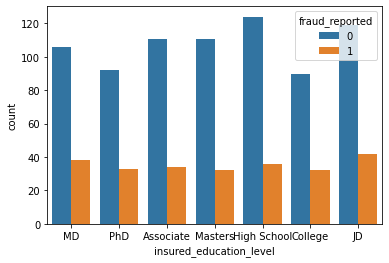

In [36]:
sns.countplot(x=auto_claim['insured_education_level'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [57]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

auto_claim.replace({"High School": 0, "JD": 1,"College":2,"Masters":3,"Associate":4,"PhD":5,"MD":6}, inplace = True)

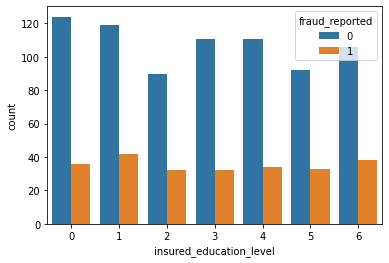

In [38]:
sns.countplot(x=auto_claim['insured_education_level'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [39]:
auto_claim['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

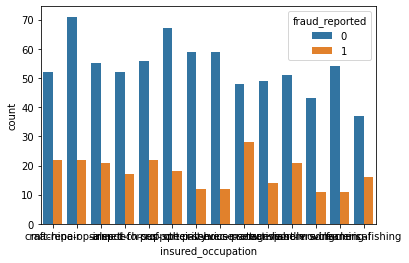

In [40]:
sns.countplot(x=auto_claim['insured_occupation'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [56]:
# As insured_occupation is Nominal Categorical data we will perform OneHotEncoding

insured_occupation = auto_claim[["insured_occupation"]]

insured_occupation = pd.get_dummies(insured_occupation, drop_first= True)

insured_occupation.head()

insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                1                                0   
4                                0                                0   

   insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  \
0                                     0                                     0   
1                                     0                                     1   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   insured_occupation_other-service  insured_occupation_priv-house-serv  \
0                                 0                                   0   
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 0                                   0   

   insured_occupation_prof-specialty  insured_occupation_protective-serv  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   insured_occupation_sales  insured_occupation_tech-support  \
0                         0                                0   
1                         0                                0   
2                         1                                0   
3                         0                                0   
4                         1                                0   

   insured_occupation_transport-moving  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0

In [42]:
auto_claim['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

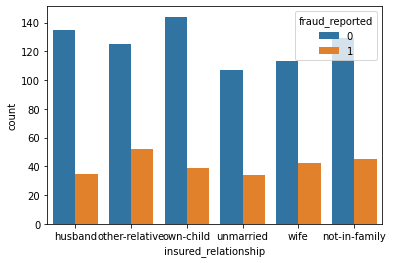

In [43]:
sns.countplot(x=auto_claim['insured_relationship'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [58]:
# As insured_relationship is Nominal Categorical data we will perform OneHotEncoding

insured_relationship = auto_claim[["insured_relationship"]]
insured_relationship = pd.get_dummies(insured_relationship, drop_first= True)
insured_relationship.head()

insured_relationship_not-in-family  insured_relationship_other-relative  \
0                                   0                                    0   
1                                   0                                    1   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

   insured_relationship_own-child  insured_relationship_unmarried  \
0                               0                               0   
1                               0                               0   
2                               1                               0   
3                               0                               1   
4                               0                               1   

   insured_relationship_wife  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [45]:
auto_claim['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

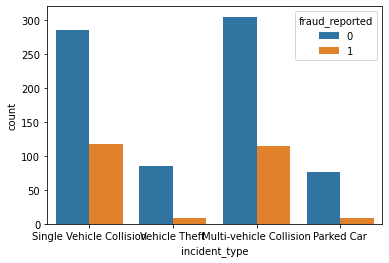

In [46]:
sns.countplot(x=auto_claim['incident_type'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [59]:
# As incident_type is Nominal Categorical data we will perform OneHotEncoding

incident_type = auto_claim[["incident_type"]]
incident_type = pd.get_dummies(incident_type, drop_first= True)
incident_type.head()

incident_type_Parked Car  incident_type_Single Vehicle Collision  \
0                         0                                       1   
1                         0                                       0   
2                         0                                       0   
3                         0                                       1   
4                         0                                       0   

   incident_type_Vehicle Theft  
0                            0  
1                            1  
2                            0  
3                            0  
4                            1

In [48]:
auto_claim['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Unknown            178
Name: collision_type, dtype: int64

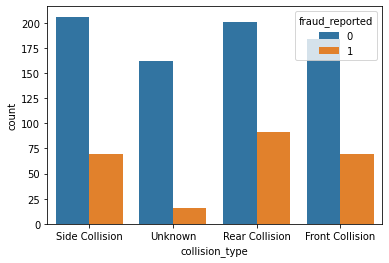

In [49]:
sns.countplot(x=auto_claim['collision_type'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [60]:
# As collision_type is Nominal Categorical data we will perform OneHotEncoding

collision_type = auto_claim[["collision_type"]]
collision_type = pd.get_dummies(collision_type, drop_first= True)
collision_type.head()

collision_type_Rear Collision  collision_type_Side Collision  \
0                              0                              1   
1                              0                              0   
2                              1                              0   
3                              0                              0   
4                              0                              0   

   collision_type_Unknown  
0                       0  
1                       1  
2                       0  
3                       0  
4                       1

In [51]:
auto_claim['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

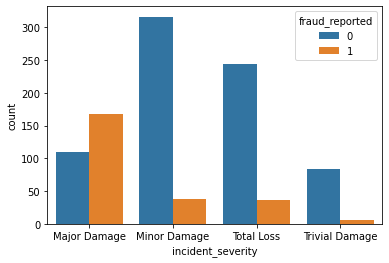

In [52]:
sns.countplot(x=auto_claim['incident_severity'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [61]:
# As incident_severity is Nominal Categorical data we will perform OneHotEncoding

incident_severity = auto_claim[["incident_severity"]]
incident_severity = pd.get_dummies(incident_severity, drop_first= True)
incident_severity.head()

incident_severity_Minor Damage  incident_severity_Total Loss  \
0                               0                             0   
1                               1                             0   
2                               1                             0   
3                               0                             0   
4                               1                             0   

   incident_severity_Trivial Damage  
0                                 0  
1                                 0  
2                                 0  
3                                 0  
4                                 0

In [54]:
auto_claim['authorities_contacted'].value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

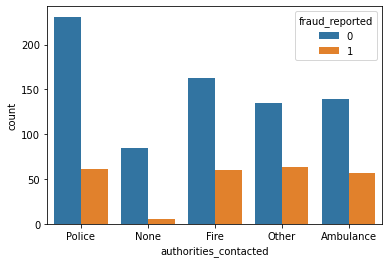

In [55]:
sns.countplot(x=auto_claim['authorities_contacted'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [62]:
authorities_contacted = auto_claim[["authorities_contacted"]]
authorities_contacted = pd.get_dummies(authorities_contacted, drop_first= True)
authorities_contacted.head()

authorities_contacted_Fire  authorities_contacted_None  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           1   

   authorities_contacted_Other  authorities_contacted_Police  
0                            0                             1  
1                            0                             1  
2                            0                             1  
3                            0                             1  
4                            0                             0

In [57]:
auto_claim['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

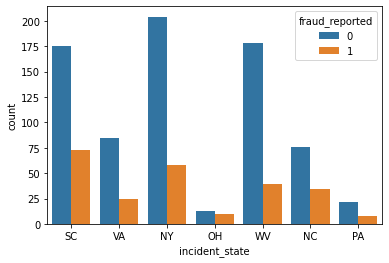

In [58]:
sns.countplot(x=auto_claim['incident_state'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [63]:
# As incident_state is Nominal Categorical data we will perform OneHotEncoding

incident_state = auto_claim[["incident_state"]]
incident_state = pd.get_dummies(incident_state, drop_first= True)
incident_state.head()

incident_state_NY  incident_state_OH  incident_state_PA  incident_state_SC  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  0   
2                  1                  0                  0                  0   
3                  0                  1                  0                  0   
4                  1                  0                  0                  0   

   incident_state_VA  incident_state_WV  
0                  0                  0  
1                  1                  0  
2                  0                  0  
3                  0                  0  
4                  0                  0

In [60]:
auto_claim['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

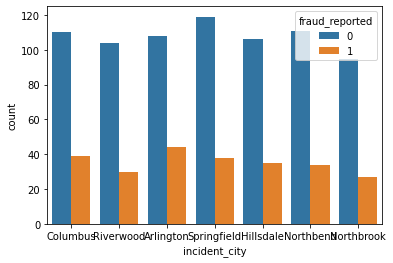

In [61]:
sns.countplot(x=auto_claim['incident_city'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [64]:
# As incident_city is Nominal Categorical data we will perform OneHotEncoding

incident_city = auto_claim[["incident_city"]]
incident_city = pd.get_dummies(incident_city, drop_first= True)
incident_city.head()

incident_city_Columbus  incident_city_Hillsdale  incident_city_Northbend  \
0                       1                        0                        0   
1                       0                        0                        0   
2                       1                        0                        0   
3                       0                        0                        0   
4                       0                        0                        0   

   incident_city_Northbrook  incident_city_Riverwood  \
0                         0                        0   
1                         0                        1   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   incident_city_Springfield  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [63]:
auto_claim['property_damage'].value_counts()

Unknown    360
NO         338
YES        302
Name: property_damage, dtype: int64

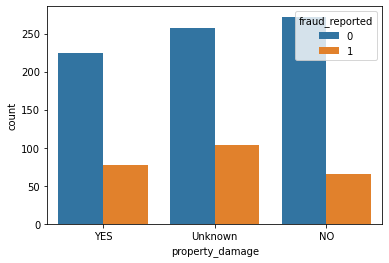

In [64]:
sns.countplot(x=auto_claim['property_damage'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [65]:
# As property_damage is Nominal Categorical data we will perform OneHotEncoding

property_damage = auto_claim[["property_damage"]]
property_damage = pd.get_dummies(property_damage, drop_first= True)
property_damage.head()

property_damage_Unknown  property_damage_YES
0                        0                    1
1                        1                    0
2                        0                    0
3                        1                    0
4                        0                    0

In [66]:
auto_claim['police_report_available'].value_counts()

Unknown    343
NO         343
YES        314
Name: police_report_available, dtype: int64

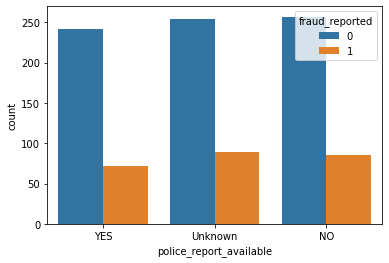

In [67]:
sns.countplot(x=auto_claim['police_report_available'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [66]:
# As police_report_available is Nominal Categorical data we will perform OneHotEncoding

police_report_available = auto_claim[["police_report_available"]]
police_report_available = pd.get_dummies(police_report_available, drop_first= True)
police_report_available.head()

police_report_available_Unknown  police_report_available_YES
0                                0                            1
1                                1                            0
2                                0                            0
3                                0                            0
4                                0                            0

In [69]:
auto_claim['insured_occupation'].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

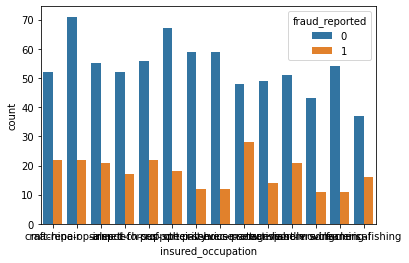

In [70]:
sns.countplot(x=auto_claim['insured_occupation'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [67]:
# As insured_occupation is Nominal Categorical data we will perform OneHotEncoding

insured_occupation = auto_claim[["insured_occupation"]]
insured_occupation = pd.get_dummies(insured_occupation, drop_first= True)
insured_occupation.head()

insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                1                                0   
4                                0                                0   

   insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   insured_occupation_handlers-cleaners  insured_occupation_machine-op-inspct  \
0                                     0                                     0   
1                                     0                                     1   
2                                     0                                     0   
3                                     0                                     0   
4                                     0                                     0   

   insured_occupation_other-service  insured_occupation_priv-house-serv  \
0                                 0                                   0   
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 0                                   0   

   insured_occupation_prof-specialty  insured_occupation_protective-serv  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   0   
4                                  0                                   0   

   insured_occupation_sales  insured_occupation_tech-support  \
0                         0                                0   
1                         0                                0   
2                         1                                0   
3                         0                                0   
4                         1                                0   

   insured_occupation_transport-moving  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0

In [72]:
auto_claim['insured_relationship'].value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

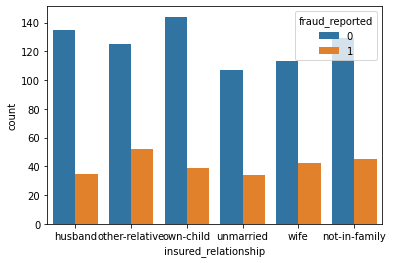

In [73]:
sns.countplot(x=auto_claim['insured_relationship'],hue=auto_claim['fraud_reported'],data=auto_claim)

In [74]:
# As insured_relationship is Nominal Categorical data we will perform OneHotEncoding

insured_relationship = auto_claim[["insured_relationship"]]
insured_relationship = pd.get_dummies(insured_relationship, drop_first= True)
insured_relationship.head()

insured_relationship_not-in-family  insured_relationship_other-relative  \
0                                   0                                    0   
1                                   0                                    1   
2                                   0                                    0   
3                                   0                                    0   
4                                   0                                    0   

   insured_relationship_own-child  insured_relationship_unmarried  \
0                               0                               0   
1                               0                               0   
2                               1                               0   
3                               0                               1   
4                               0                               1   

   insured_relationship_wife  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

In [75]:
auto_claim['incident_city'].value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [68]:
cat_cols=auto_claim.select_dtypes(['object']).columns
#cat_cols=cat_cols.drop('fraud_reported')
print(cat_cols)

Index(['policy_state', 'insured_occupation', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model'],
      dtype='object')


delete unuseful features

In [69]:
auto_claim.drop(['incident_location','auto_make','auto_model'],axis=1,inplace=True)

In [70]:
# Concatenate dataframe --> auto_claim + ENCODED FEATURES

data_train = pd.concat([auto_claim, policy_state, insured_occupation, insured_relationship, incident_type, collision_type,
                       incident_severity, authorities_contacted, incident_state, incident_city, property_damage, 
                       police_report_available], axis = 1)

In [71]:
data_train.shape

(1000, 80)

In [ ]:
# let's drop the parent columns

In [72]:
data_train.drop(['policy_state', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type',
                       'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 
                       'police_report_available'], axis = 1,inplace = True)

In [73]:
data_train.shape

(1000, 69)

In [82]:
data_train.head()

months_as_customer  age  policy_csl  policy_deductable  \
0                 328   48       375.0               1000   
1                 228   42       375.0               2000   
2                 134   29       200.0               2000   
3                 256   41       375.0               2000   
4                 228   44       750.0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            0   
1                1197.22         5000000            0   
2                1413.14         5000000            1   
3                1415.74         6000000            1   
4                1583.91         6000000            0   

   insured_education_level  capital-gains  capital-loss  ...  \
0                        6          53300             0  ...   
1                        6              0             0  ...   
2                        5          35100             0  ...   
3                        5          48900        -62400  ...   
4                        4          66000        -46000  ...   

   incident_city_Columbus  incident_city_Hillsdale  incident_city_Northbend  \
0                       1                        0                        0   
1                       0                        0                        0   
2                       1                        0                        0   
3                       0                        0                        0   
4                       0                        0                        0   

   incident_city_Northbrook  incident_city_Riverwood  \
0                         0                        0   
1                         0                        1   
2                         0                        0   
3                         0                        0   
4                         0                        0   

   incident_city_Springfield  property_damage_Unknown  property_damage_YES  \
0                          0                        0                    1   
1                          0                        1                    0   
2                          0                        0                    0   
3                          0                        1                    0   
4                          0                        0                    0   

   police_report_available_Unknown  police_report_available_YES  
0                                0                            1  
1                                1                            0  
2                                0                            0  
3                                0                            0  
4                                0                            0  

[5 rows x 69 columns]

In [83]:
data_train.dtypes

months_as_customer                   int64
age                                  int64
policy_csl                         float64
policy_deductable                    int64
policy_annual_premium              float64
                                    ...   
incident_city_Springfield            uint8
property_damage_Unknown              uint8
property_damage_YES                  uint8
police_report_available_Unknown      uint8
police_report_available_YES          uint8
Length: 69, dtype: object

Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1. heatmap
2. feature_importance_
3. SelectKBest

In [84]:
data_train.shape

(1000, 69)

In [85]:
data_train.columns

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported',
       'policy_state_IN', 'policy_state_OH', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transpor

In [74]:
X=data_train.drop('fraud_reported',axis=1)
y=data_train['fraud_reported']

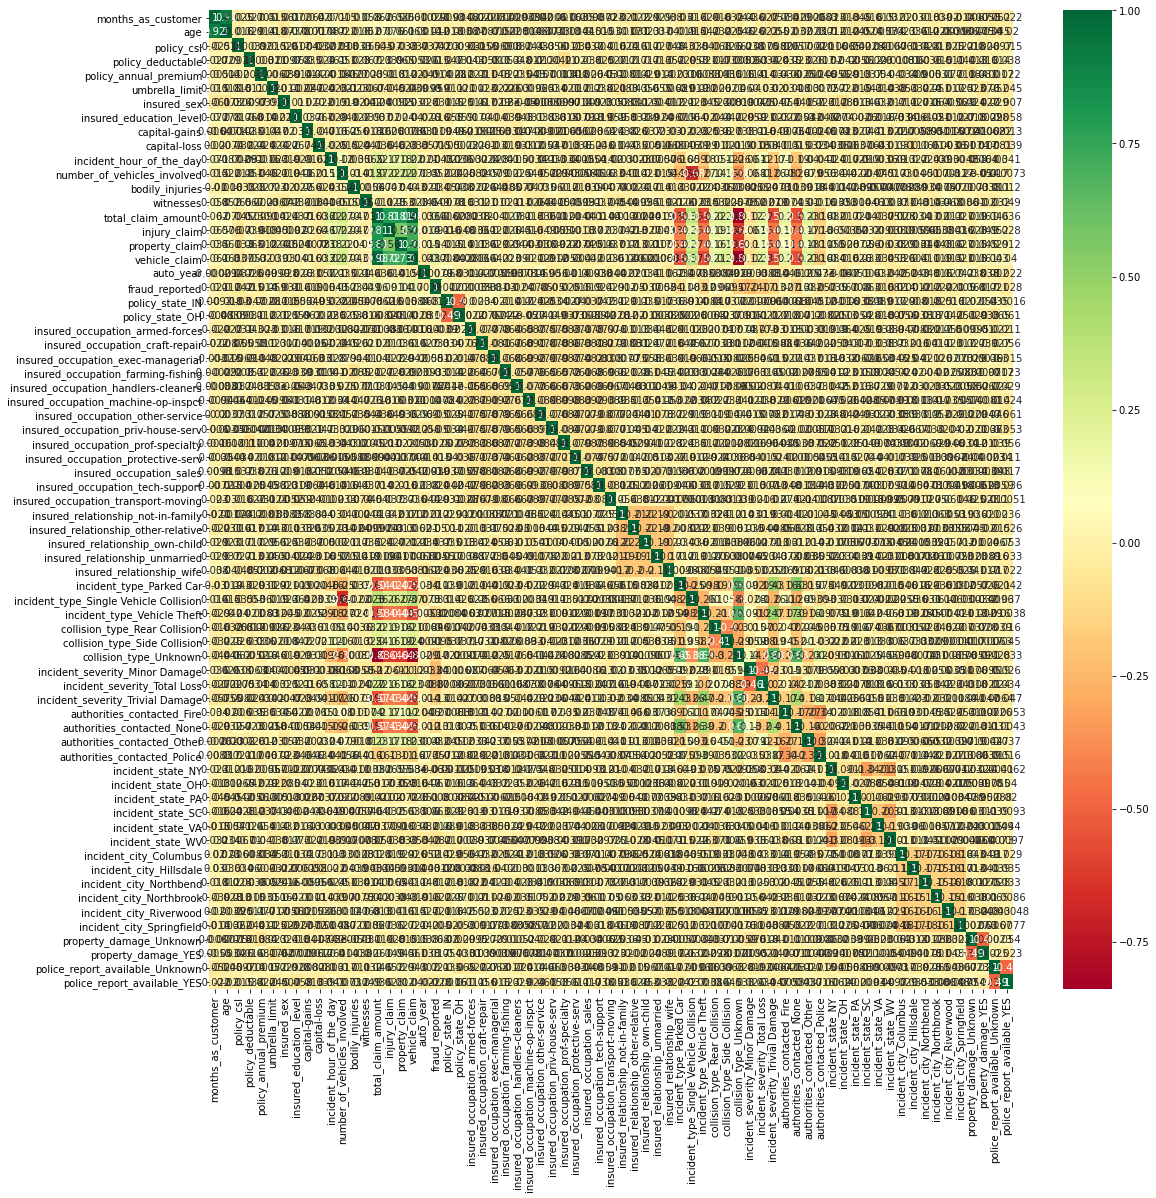

In [50]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [75]:
# Important feature using ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

In [52]:
print(selection.feature_importances_)

[0.02154092 0.02147561 0.01947832 0.01748478 0.02151223 0.01628718
 0.0135489  0.02052968 0.02013899 0.01996046 0.02085041 0.01460836
 0.02017819 0.01957702 0.02615854 0.02046083 0.02677583 0.02415586
 0.02176053 0.01400217 0.01374455 0.00885207 0.00873662 0.01338443
 0.00661083 0.00938072 0.00898876 0.00515134 0.00598    0.00751016
 0.00775654 0.00855576 0.00935385 0.00806268 0.01095637 0.0124429
 0.0118687  0.01056964 0.01098462 0.00341266 0.01147653 0.00483354
 0.01501519 0.00939018 0.00988905 0.07938958 0.07305656 0.00722899
 0.01156755 0.0037355  0.01039136 0.01139303 0.01049681 0.0056421
 0.00730603 0.01128816 0.00884078 0.01172785 0.01092445 0.01137785
 0.00919048 0.00880269 0.01007831 0.00985083 0.01297655 0.01285363
 0.01515502 0.01333337]


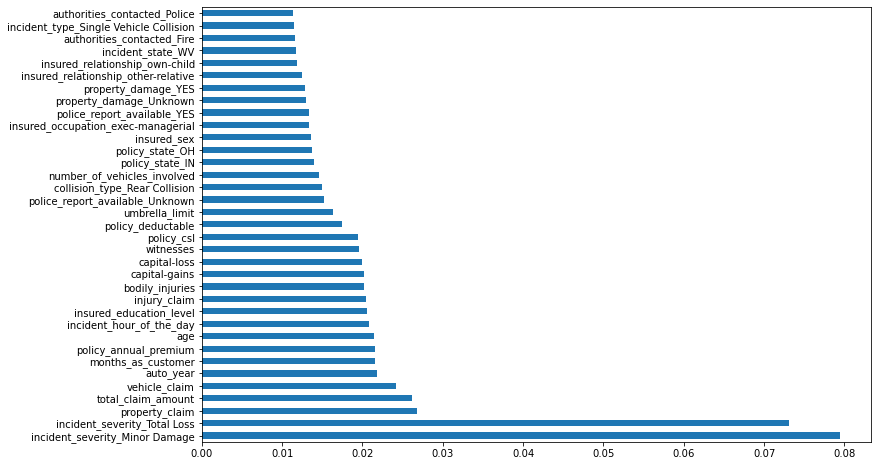

In [57]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

Below pipeline will tell us the best performing Machine learning Model on this data set

9 popular machine learning algorithms I have included in this pipeline
K-Fold validation with 5 Folds, scoring method -'roc-auc'

In [59]:
from sklearn.pipeline import Pipeline
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR',LogisticRegression())])))
#pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
#pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', MinMaxScaler()),('DT', DecisionTreeClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', MinMaxScaler()),('ET', ExtraTreesClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', MinMaxScaler()),('XGB', XGBClassifier())])))
pipelines.append(('ScaledNN', Pipeline([('Scaler', MinMaxScaler()),('NN', MLPClassifier())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', MinMaxScaler()),('SVC', SVC())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=5, random_state=5)
    cv_results = cross_val_score(model, X, y, cv=kfold, n_jobs=-1,scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.756557 (0.042540)
ScaledDT: 0.639173 (0.033820)
ScaledRF: 0.756308 (0.047088)
ScaledET: 0.749952 (0.039457)
ScaledGBM: 0.742996 (0.044985)
ScaledXGB: 0.731157 (0.051668)
ScaledNN: 0.726298 (0.047392)
ScaledSVR: 0.750934 (0.044893)
ScaledKNN: 0.628761 (0.039961)


LogisticRegression and RandomForestClassifier is the best model for this data set

Let's split the data into train and test

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
a_train,a_test=train_test_split(data_train, test_size = 0.2,random_state=2)

In [78]:
x_train=a_train.drop(["fraud_reported"],1)
y_train=a_train["fraud_reported"]

x_test=a_test.drop(["fraud_reported"],1)
y_test=a_test["fraud_reported"]

In [79]:
print(x_train.shape,x_test.shape)

(800, 68) (200, 68)


In [80]:
x_train.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
x_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

Let's use LogisticRegression first

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [66]:
params={'class_weight':['balanced',None],
       'penalty':['l1','l2'],
       'C':np.linspace(0.01,1000,500)
}

In [67]:
model=LogisticRegression(fit_intercept=True)

In [68]:
grid_search=GridSearchCV(model,param_grid=params,cv=10,scoring='roc_auc',n_jobs=-1,verbose=1)

In [69]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 3032 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4832 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 7032 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 9632 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 12632 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 16032 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 19832 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 20000 out of 20000 | elapsed:  6.1min finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-02, 2.01398798e+00, 4.01797595e+00, 6.02196393e+00,
       8.02595190e+00, 1.00299399e+01, 1.20339279e+01, 1.40379158e+01,
       1.60419038e+01, 1.80458918e+01, 2.00498798e+01, 2.20538677e+01,
       2.40578557e+01, 2.60618437e+01, 2.80658317e+01, 3.00698196e+01,
       3.20738076e+01, 3.40777956e+...
       9.61924228e+02, 9.63928216e+02, 9.65932204e+02, 9.67936192e+02,
       9.69940180e+02, 9.71944168e+02, 9.73948156e+02, 9.75952144e+02,
       9.77956132e+02, 9.79960120e+02, 9.81964108e+02, 9.83968096e+02,
       9.85972084e+02, 9.87976072e+02, 9.89980060e+02, 9.91984048e+02,
       9.93988036e+02, 9.95992024e+02, 9.97996012e+02, 1.00000000e+03]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [71]:
LR=grid_search.best_estimator_

This function will tell the best parameters for the above iteratin 

In [72]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:3f}(std:{1:.5f})'.format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [74]:
report(grid_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.594281(std:0.08316)
parameters: {'C': 74.15755511022044, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.594165(std:0.08227)
parameters: {'C': 72.15356713426854, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 3
Mean validation score: 0.594016(std:0.07882)
parameters: {'C': 334.6759919839679, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 4
Mean validation score: 0.593406(std:0.08537)
parameters: {'C': 70.14957915831664, 'class_weight': 'balanced', 'penalty': 'l2'}

Model with rank: 5
Mean validation score: 0.593243(std:0.08024)
parameters: {'C': 222.4526653306613, 'class_weight': 'balanced', 'penalty': 'l2'}



In [75]:
LR.fit(X,y)

LogisticRegression(C=74.15755511022044, class_weight='balanced')

In [76]:
p=LR.predict(x_test)

In [77]:
roc_auc_score(y_test,p)

0.6347479389106636

0.6347479389106636 is less accurate, Hence try K-fold cross validation

Lets do the K-fold cross validation with the best score and also incresed the number of folds to 10 and Iterations 20

In [78]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
LR_model = LogisticRegression(**{'C':74.15755511022044 , 'class_weight':'balanced', 'penalty': 'l2'})
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=20)
n_scores = cross_val_score(LR_model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise',verbose=1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.5s


MAE: 0.584 (0.068)


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    8.8s finished


In [79]:
LR_model.fit(X,y)

LogisticRegression(C=74.15755511022044, class_weight='balanced')

In [80]:
p=LR_model.predict(x_test)

In [81]:
roc_auc_score(y_test,p)

0.6347479389106636

No improvements, Lets try RandomForestClassifier

RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [83]:
param_dist={'n_estimators':[i for i in range (100,5000,200)],
             'max_features':[i for i in range (2,60,3)],
             'bootstrap':[True,False],
        'class_weight':[None,'balanced'],
       'criterion':['entropy','gini'],
       'max_depth':[i for i in range (2,100,5)],
           'min_samples_leaf':[1,2,5,10,15,20],
           'min_samples_split':[i for i in range(2,100,3)] 
       }

In [84]:
clf=RandomForestClassifier(n_jobs=-1,verbose=1)

In [85]:
random_search=RandomizedSearchCV(clf,cv=10,
                                param_distributions=param_dist,
                                scoring='roc_auc',
                                n_iter=10
                                )

In [86]:
random_search.fit(x_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 2300 out of 2300 | elapsed:    6.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 2300 out of 2300 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2300 out of 2300 | elapsed:    4.8s fini

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 3100 out of 3100 | elapsed:    1.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 3100 out of 3100 | elapsed:    7.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]:

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1300 out of 1300 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1300 out of 1300 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1300 out of 1300 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.3

[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 3640 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 4300 out of 4300 | elapsed:    7.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 4300 out of 4300 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)

[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 2300 out of 2300 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1496 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 2300 out of 2300 | elapsed:    8.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 2300 out of 2300 | elapsed:    1.2s finished
[Parallel(

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    3.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    3.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBack

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 4700 out of 4700 | elapsed:    3.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 4700 out of 4700 | elapsed:   13.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1700 out of 1700 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 1700 out of 1700 | elapsed:    6.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1700 out of 1700 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent worker

[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 2100 out of 2100 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1864 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:    8.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 2100 out of 2100 | elapsed:    0.8s finished
[Parallel(

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 4900 out of 4900 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 4890 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 4900 out of 4900 | elapsed:   14.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(n_jobs=-1, verbose=1),
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 7, 12, 17, 22, 27, 32,
                                                      37, 42, 47, 52, 57, 62,
                                                      67, 72, 77, 82, 87, 92,
                                                      97],
                                        'max_features': [2, 5, 8, 11, 14, 17,
                                                         20, 23, 26, 29, 32, 35,
                                                         38, 41, 44, 47, 50, 53,
                                                         56, 59],
                                        'min_samples_leaf': [1, 2, 5, 10, 15,
  

In [88]:
rf=random_search.best_estimator_

In [89]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.735121(std:0.05303)
parameters: {'n_estimators': 1300, 'min_samples_split': 83, 'min_samples_leaf': 1, 'max_features': 35, 'max_depth': 32, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 2
Mean validation score: 0.735094(std:0.04066)
parameters: {'n_estimators': 3100, 'min_samples_split': 71, 'min_samples_leaf': 1, 'max_features': 23, 'max_depth': 7, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': False}

Model with rank: 3
Mean validation score: 0.734155(std:0.05575)
parameters: {'n_estimators': 4300, 'min_samples_split': 98, 'min_samples_leaf': 10, 'max_features': 26, 'max_depth': 42, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': True}

Model with rank: 4
Mean validation score: 0.731481(std:0.05177)
parameters: {'n_estimators': 4700, 'min_samples_split': 26, 'min_samples_leaf': 20, 'max_features': 56, 'max_depth': 87, 'criterion': 'entropy', 'class_weight': None, 'bootstrap':

In [90]:
rf.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 1300 out of 1300 | elapsed:    7.4s finished


RandomForestClassifier(class_weight='balanced', max_depth=32, max_features=35,
                       min_samples_split=83, n_estimators=1300, n_jobs=-1,
                       verbose=1)

In [91]:
p=rf.predict(x_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1300 out of 1300 | elapsed:    0.9s finished


In [92]:
roc_auc_score(y_test,p)

0.8347749695904852

0.8347749695904852 is a good accuerecy Let's do Hyper parameter tuning

Hyper parameter tuning for RandomForestClassifier

In [93]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

In [94]:
param_space = {
    'max_depth': hp.choice('max_depth', range(1,100)),
    'max_features': hp.choice('max_features', range(2,65)),
    'n_estimators': hp.choice('n_estimators', range(100,5000)),
    'criterion': hp.choice('criterion', ["gini", "entropy"]),
    
    'min_samples_leaf': hp.choice('min_samples_leaf',range(1,50)),
    'min_samples_split': hp.choice('min_samples_split',range(1,50))
    

}

In [95]:
def acc_model(params):
    RF = RandomForestClassifier(**params)
    return cross_val_score(RF, x_train, y_train).mean()

In [96]:
best = 0
def f(params):
    global best
    acc = acc_model(params)
    if acc > best:
        best = acc
    print ('new best:', best, params)
    return {'loss': -acc, 'status': STATUS_OK}

In [97]:
trials = Trials()
best = fmin(f, param_space, algo=tpe.suggest, max_evals=10, trials=trials)
print ('best:')
print (best)

new best:                                             
0.7525000000000001                                    
{'criterion': 'entropy', 'max_depth': 75, 'max_features': 4, 'min_samples_leaf': 42, 'min_samples_split': 14, 'n_estimators': 2480}
new best:                                                                        
0.7887500000000001                                                               
{'criterion': 'entropy', 'max_depth': 59, 'max_features': 33, 'min_samples_leaf': 15, 'min_samples_split': 26, 'n_estimators': 3054}
new best:                                                                         
0.7887500000000001                                                                
{'criterion': 'gini', 'max_depth': 94, 'max_features': 20, 'min_samples_leaf': 14, 'min_samples_split': 17, 'n_estimators': 296}
new best:                                                                         
0.7887500000000001                                                               
{

We got the best tuning for this model

{'criterion': 'gini', 'max_depth': 17, 'max_features': 51, 'min_samples_leaf': 34, 'min_samples_split': 15, 'n_estimators': 1389}

let's re-build the model with k-fold cross validation

In [92]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
RF_model = RandomForestClassifier(**{'criterion': 'gini', 'max_depth': 17, 'max_features': 51, 'min_samples_leaf': 34, 'min_samples_split': 15, 'n_estimators': 1389})
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=10)
n_scores = cross_val_score(RF_model, x_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise',verbose=1)
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min


MAE: 0.722 (0.079)


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.6min finished


In [93]:
RF_model.fit(X,y)

RandomForestClassifier(max_depth=17, max_features=51, min_samples_leaf=34,
                       min_samples_split=15, n_estimators=1389)

In [94]:
p=RF_model.predict(x_test)

In [95]:
roc_auc_score(y_test,p)

0.838086227868631

0.838086227868631 is the slight improvement of the score
Let's use this model 'RF_model' for building API

# Save the model to build Flask API

In [96]:
import pickle
# open a file, where you ant to store the data
file = open('Fraud_rf.pkl', 'wb')

# dump information to that file
pickle.dump(RF_model, file)

In [82]:
import pickle
model = open('Fraud_rf.pkl','rb')
forest = pickle.load(model)
forest

RandomForestClassifier(max_depth=17, max_features=51, min_samples_leaf=34,
                       min_samples_split=15, n_estimators=1389)

In [83]:
y_prediction = forest.predict(x_test)

In [84]:
roc_auc_score(y_prediction,y_test)

0.8210756000513413

# Let's look in to the data further more

In [90]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [88]:
%%time


#xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, base_score=0.5,objective='binary:logistic', random_state=42)
RF = RandomForestClassifier(**{'criterion': 'gini', 'max_depth': 17, 'max_features': 51, 'min_samples_leaf': 34, 'min_samples_split': 15, 'n_estimators': 1389})

RF.fit(X, y)

Wall time: 18.5 s


RandomForestClassifier(max_depth=17, max_features=51, min_samples_leaf=34,
                       min_samples_split=15, n_estimators=1389)

feature_importance using RandomForestClassifier()

[68/68] features ████████████████████ Time elapsed: 68 seconds

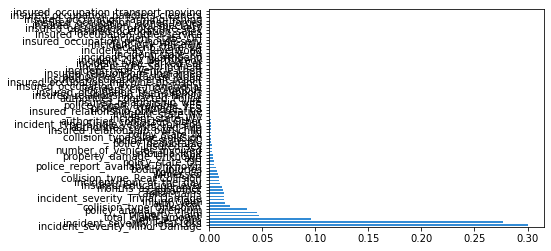

In [91]:
interpreter = Interpretation(X, feature_names=X.columns)
model = InMemoryModel(RF.predict_proba, examples=X)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)

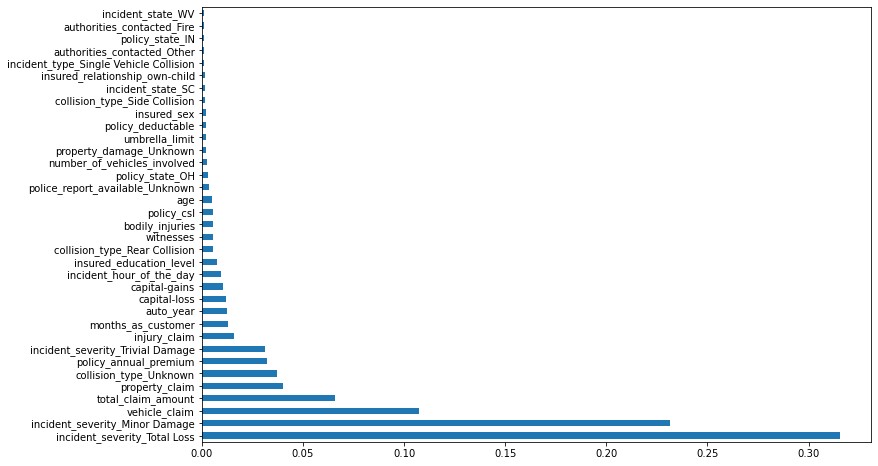

In [92]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(RF.feature_importances_, index=X.columns)
feat_importances.nlargest(35).plot(kind='barh')
plt.show()

Lets check which all are the top 10 features contributing towards each target classes (1,0)

In [93]:
RF.classes_

array([0, 1])

In [106]:
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
#from skater.util.dataops import show_in_notebook
exp = LimeTabularExplainer(X.values, 
                           feature_names=X.columns, 
                           discretize_continuous=True, 
                           class_names=['Y_0', 'Y_1'])
exp.explain_instance(X.iloc[500].values, RF.predict_proba).show_in_notebook()

Lets build some partial dependence plots to investigate further

[2/2] grid cells ████████████████████ Time elapsed: 12 seconds

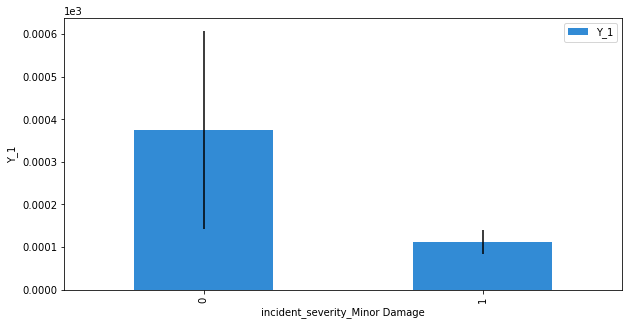

In [97]:
pyint_model = InMemoryModel(RF.predict_proba, examples=X, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['incident_severity_Minor Damage'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))


[30/30] grid cells ████████████████████ Time elapsed: 28 seconds

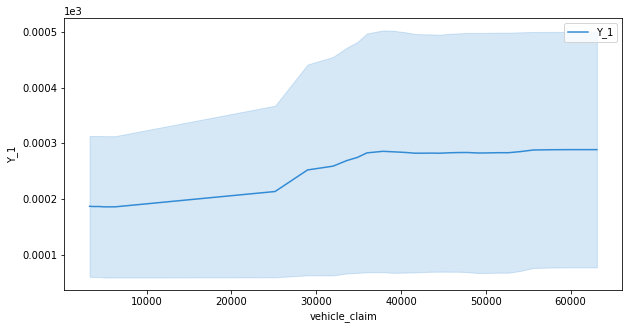

In [99]:
pyint_model = InMemoryModel(RF.predict_proba, examples=X, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['vehicle_claim'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

[2/2] grid cells ████████████████████ Time elapsed: 12 seconds

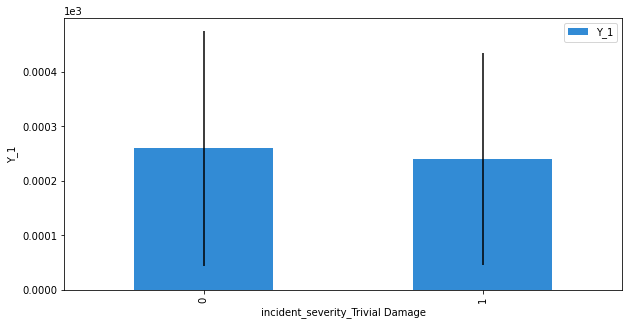

In [101]:
pyint_model = InMemoryModel(RF.predict_proba, examples=X, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['incident_severity_Trivial Damage'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

[2/2] grid cells ████████████████████ Time elapsed: 13 seconds

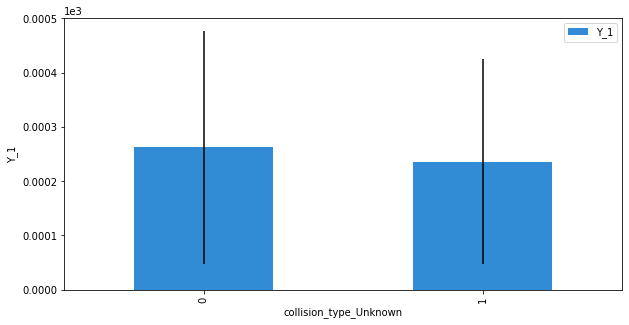

In [102]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(['collision_type_Unknown'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

[4/4] grid cells ████████████████████ Time elapsed: 17 seconds

[[<Figure size 1152x720 with 1 Axes>,

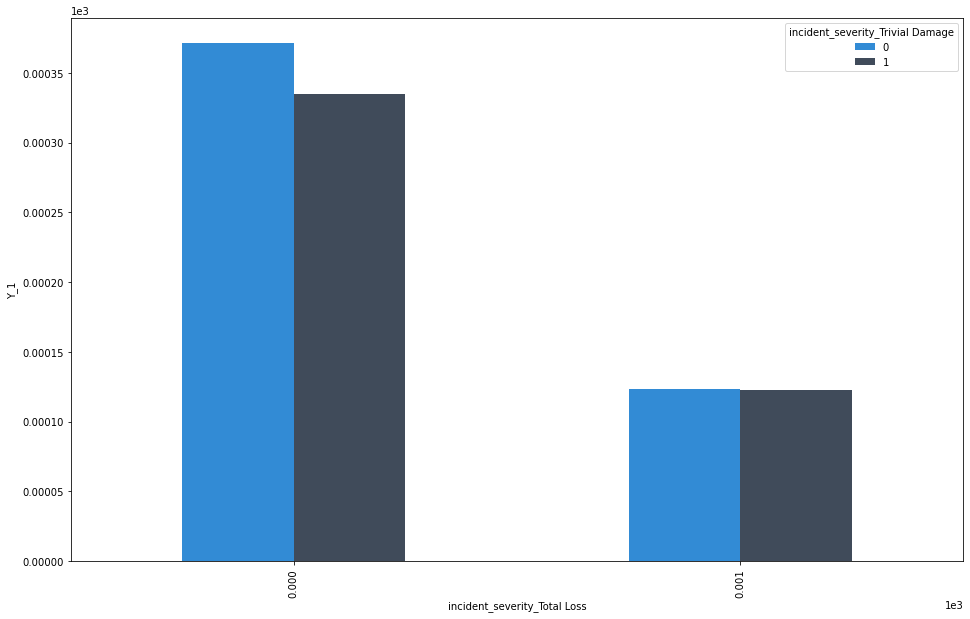

In [107]:
model = InMemoryModel(RF.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([( 'incident_severity_Total Loss','incident_severity_Trivial Damage')], model, 
                                                       grid_resolution=10)

[4/4] grid cells ████████████████████ Time elapsed: 16 seconds

[[<Figure size 1152x720 with 1 Axes>,

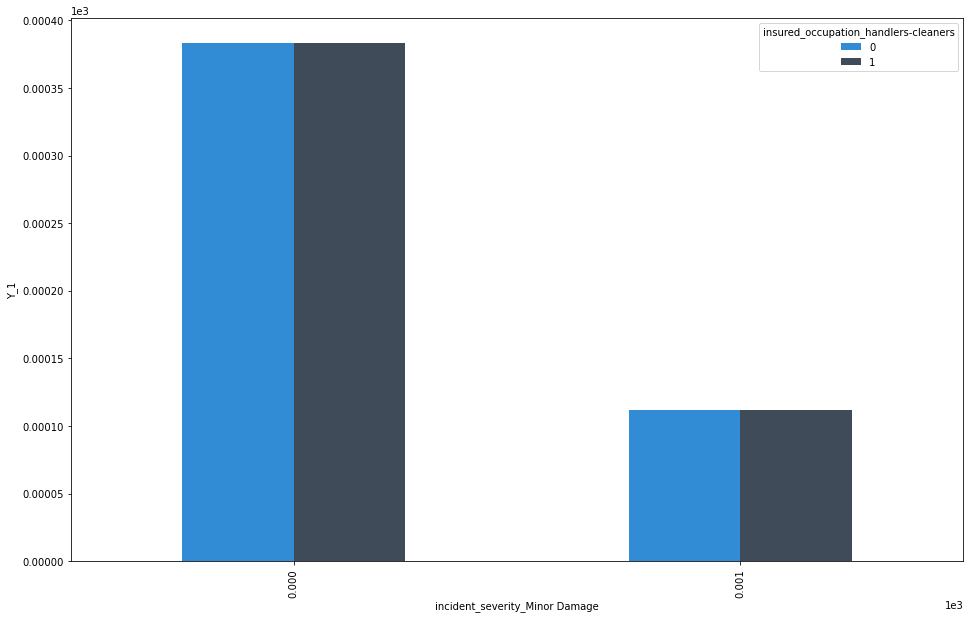

In [108]:
model = InMemoryModel(RF.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([( 'incident_severity_Minor Damage','insured_occupation_handlers-cleaners')], model, 
                                                       grid_resolution=10)

[100/100] grid cells ████████████████████ Time elapsed: 36 seconds

[[<Figure size 1152x720 with 2 Axes>,

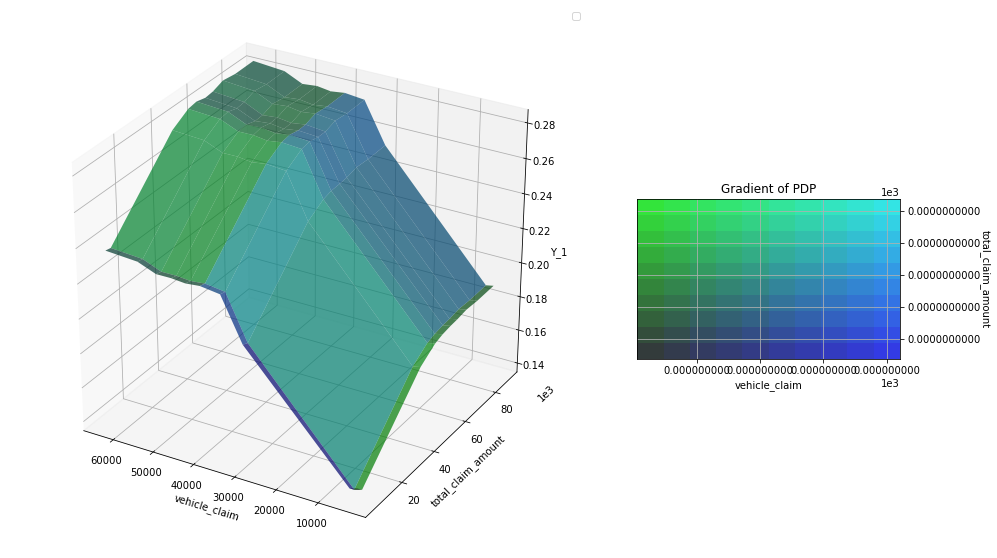

In [109]:
model = InMemoryModel(RF.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([( 'vehicle_claim','total_claim_amount')], model, 
                                                       grid_resolution=10)

In [ ]:
model = InMemoryModel(RF.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([( 'vehicle_claim','capital')], model, 
                                                       grid_resolution=10)

Observations:-

    1. incident_severity_Total Loss and incident_severity_minor Damage has the highest contribution towards fraud detection
    2. vehicle_claim, total_vlaim amount and property_claim also has contributing towards the prediction
    3. collision_type_unknown also has good contribution towards prediction
    4. policy_annual_premium has good impact on this fraud detection model
    5. Claim amount having good impact on fraud transactions
    6. Since most of this 68 features are having enough contribution towards prediction, I decided to build an flask API with 68 features